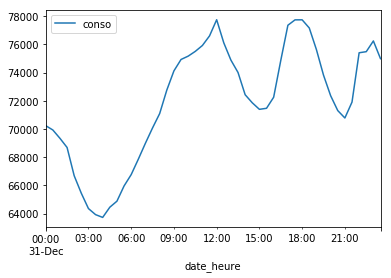

In [4]:
"""
Plot any timeserie taken from the https://rte-opendata.opendatasoft.com plateform.
Choose parameters below after visiting the portal

Step 1 : find the right url on rte-opendata.opendatasoft.com
Step 2 : request it 
Step 3 : save the response it json format
Step 4 : create a dataframe with the data with pd.DataFrame.from_dict
Step 5 : Clean the datetime column
Step 6 : plot
"""

%matplotlib inline
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

DATASET = "cdc_conso"
date_col = "date_heure"
value_col = "conso"
rows = 1000
requested_date = "2016 12 31"

# Construct url
ODS_API_URL = "https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset={dataset}&rows={rows}&sort=-{date_col}"
api_url = ODS_API_URL.format(dataset=DATASET, rows=rows ,date_col=date_col)
requested_date = requested_date.replace(" ","%2F")
api_url = "{}&refine.date_heure={}".format(api_url,requested_date)

# Request data
r = requests.get(api_url)
data = r.json()

# Clean dataframe
df = pd.DataFrame.from_dict([d["fields"] for d in data["records"]])
df[date_col]=pd.to_datetime(df[date_col])
timeserie = df.set_index(df[date_col])

# Plot
timeserie.plot()

